# Lending Tree _revisited_

![](banner_lending_tree.jpg)

Data Analysis Lifecycle, Kernel Density Estimation (KDE), Principal Component Analysis (PCA)<br/>
Naive Bayes, Support Vector Machine (SVM), Neural Network, Logistic Regression, Decision Tree, k Nearest Neighbors

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)                                                     
update_geom_defaults("point", list(size=0.01, colour=PALETTE[1]))
update_geom_defaults("vline", list(color="black", size=0.15))

== document setup ==

## Situation

LendingTree is an online lending exchange that connects consumers with multiple lenders, banks, and credit partners who compete for business.  Since being founded in 1998 LendingTree has facilitated more than 32 million loan requests.

* **Role:** Banker. 
* **Business Decision:** Lend to whom?
* **Approach:** Use kernel density estimation and principal component analysis to look for features that distinguish known good vs. bad loans, and use that insight to inform decisions about new loan applications.  
* **Dataset:** Lending Tree Loans 2007-2010 ()

## Business Model

### Influence Diagram

<img src="business-model_lending_tree.jpg" align=left width=600 />

## Data 

In [2]:
datax = read.csv("Lending Tree Loans.csv") # may take about 2 minutes
size(datax)
head(datax, 3) %>% caption("First few observations ...", position="left")

observations,variables
887379,74


id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,,10+ years,RENT,24000,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-1985,1,NA,NA,3,0,13648,83.7,9,f,0,0,5861.071,5831.78,5000.00,861.07,0,0.00,0.00,Jan-2015,171.62,,Jan-2016,0,NA,1,INDIVIDUAL,NA,NA,,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-1999,5,NA,NA,3,0,1687,9.4,4,f,0,0,1008.710,1008.71,456.46,435.17,0,117.08,1.11,Apr-2013,119.66,,Sep-2013,0,NA,1,INDIVIDUAL,NA,NA,,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,,10+ years,RENT,12252,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175,,small_business,real estate business,606xx,IL,8.72,0,Nov-2001,2,NA,NA,2,0,2956,98.5,10,f,0,0,3003.654,3003.65,2400.00,603.65,0,0.00,0.00,Jun-2014,649.91,,Jan-2016,0,NA,1,INDIVIDUAL,NA,NA,,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## Prepare Data

### Select Observations

#### Note Inactive Observations

In [3]:
good_labels = c("Fully Paid", "Does not meet the credit policy. Status:Fully Paid")
bad_labels  = c("Default", "Charged Off", "Does not meet the credit policy. Status:Charged Off")
inactive.good = which(datax$loan_status %in% good_labels)
inactive.bad = which(datax$loan_status %in% bad_labels)
inactive = c(inactive.good, inactive.bad)
data.frame(good=length(inactive.good), bad=length(inactive.bad), total=length(inactive)) %>% caption("observation counts")

good,bad,total
209711,47228,256939


#### Balance Dataset

In [4]:
inactive.good = inactive.good[1:length(inactive.bad)]
inactive = c(inactive.good, inactive.bad)
data.frame(good=length(inactive.good), bad=length(inactive.bad), total=length(inactive)) %>% caption("observation counts")

good,bad,total
47228,47228,94456


#### Reduce Dataset Size

In [5]:
inactive.good = inactive.good[1:1000]
inactive.bad  = inactive.bad[1:1000]
inactive = c(inactive.good, inactive.bad)
data.frame(good=length(inactive.good), bad=length(inactive.bad), total=length(inactive)) %>% caption("observation counts")

good,bad,total
1000,1000,2000


### Select Variables

These are the convenient variables:

In [6]:
m = which(!(colnames(datax) %in% c("id","member_id")))
n = select_if.index(datax[inactive,], function(column) is.numeric(column))
f = select_if.index(datax[inactive,], function(column) !any(is.na(column)))
v = select_if.index(datax[inactive,], function(column) length(unique(column)) > 1)
                    
convenient_variables = intersect(intersect(m, n), intersect(f, v))
convenient_variables

[1]  3  4  5  7  8 14 25 26 28 31 32 33 35 37 38 39 40 41 42 43 44 45 47

### Prepared Data

In [7]:
data  = datax[inactive, convenient_variables]
class = c(rep("good", length(inactive.good)), rep("bad", length(inactive.bad)))

size(data)
head(data) %>% caption("First few observations ...", position="left")

observations,variables
2000,23


loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
5000,5000,4975,10.65,162.87,24000,27.65,0,1,3,0,13648,9,0,0,5861.071,5831.78,5000,861.07,0.00,0,0,171.62
2400,2400,2400,15.96,84.33,12252,8.72,0,2,2,0,2956,10,0,0,3003.654,3003.65,2400,603.65,0.00,0,0,649.91
10000,10000,10000,13.49,339.31,49200,20.00,0,1,10,0,5598,37,0,0,12226.302,12226.30,10000,2209.33,16.97,0,0,357.48
5000,5000,5000,7.90,156.46,36000,11.20,0,3,9,0,7963,12,0,0,5631.378,5631.38,5000,631.38,0.00,0,0,161.03
3000,3000,3000,18.64,109.43,48000,5.35,0,2,4,0,8221,4,0,0,3938.144,3938.14,3000,938.14,0.00,0,0,111.34
6500,6500,6500,14.65,153.45,72000,16.12,0,2,14,0,4032,23,0,0,7677.520,7677.52,6500,1177.52,0.00,0,0,1655.54


### Prepared Data Represented as Principal Components

In [8]:
pc = prcomp(data, scale=TRUE, retx=TRUE)
data.pc = as.data.frame(pc$x)

size(data.pc)
head(data.pc) %>% caption("First few observations ...", position="left")

observations,variables
2000,23


PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
-2.7677169,-0.4647249,0.0477444,-0.3461317,-0.8366657,1.5347064,1.2830471,-0.1930794,-0.5520828,0.3606755,0.7174092,1.1877200,0.2792778,0.7242968,0.2712265,0.1170085,-0.0389136,-0.0315869,0.0072261,-0.0029275,0.0009881,-0.0000001,0
-3.6735165,-0.4498416,-0.2391617,-1.6198479,0.5910954,0.8453327,0.0526253,1.2434912,0.1472249,-0.5988538,0.3474681,-0.1560475,0.0440970,-0.3253178,0.7903251,0.0173376,0.3854792,-0.0472537,0.0197609,0.0010705,-0.0000782,-0.0000003,0
-0.3168254,0.1808585,0.0815955,0.9791606,0.2630568,0.1305375,0.9411466,-0.7203098,-0.8534163,-1.3153871,-0.9842296,-0.2913620,0.0541492,0.6772392,0.8840810,-0.0069736,0.7114549,0.0075197,0.0168732,-0.0023582,0.0000007,-0.0000002,0
-2.7943258,-0.3379335,-0.0605565,0.0321157,-0.0356867,0.4038190,-0.0009601,1.5841788,0.4201798,-0.9413935,-0.7388978,0.8575671,0.7988811,-0.4210786,-0.3221726,0.0899730,-0.5018189,-0.0313566,-0.0343949,-0.0019593,0.0006730,0.0000002,0
-3.1396174,-0.2370205,-0.2566028,-1.6486716,1.0567514,0.2063714,-0.0789013,1.5684630,0.4533463,-0.6376663,1.1373933,-0.4806500,0.2739052,-0.2930304,0.0316012,-0.0625098,0.4539379,-0.1216070,0.0429837,0.0046421,-0.0002366,-0.0000004,0
-1.6626108,0.3119472,0.0285276,1.1335192,0.3795537,0.5261698,-0.4199443,0.8584110,0.0800718,-0.7007164,-0.2970210,-0.6509957,0.2024084,0.6278403,-0.6171058,0.0198120,0.0214857,-0.2455165,0.1122520,0.0029220,-0.0024899,0.0000000,0


### Qualitative Interpretation of Principal Components.

Here, each column lists variable names sorted by weight applied to the principal component.

In [9]:
pc_constituents(pc)

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
funded_amnt,recoveries,out_prncp_inv,open_acc,int_rate,dti,delinq_2yrs,inq_last_6mths,delinq_2yrs,total_rec_late_fee,revol_bal,int_rate,last_pymnt_amnt,annual_inc,total_acc,recoveries,total_rec_int,installment,loan_amnt,total_pymnt_inv,funded_amnt,total_pymnt,out_prncp
funded_amnt_inv,collection_recovery_fee,out_prncp,total_acc,collection_recovery_fee,annual_inc,total_rec_late_fee,pub_rec,pub_rec,inq_last_6mths,int_rate,inq_last_6mths,total_rec_int,revol_bal,open_acc,collection_recovery_fee,int_rate,loan_amnt,funded_amnt_inv,funded_amnt,funded_amnt_inv,total_rec_prncp,out_prncp_inv
loan_amnt,total_rec_prncp,dti,revol_bal,recoveries,inq_last_6mths,dti,total_rec_late_fee,total_rec_late_fee,last_pymnt_amnt,annual_inc,open_acc,total_pymnt_inv,dti,total_rec_int,total_rec_prncp,total_rec_prncp,total_rec_int,funded_amnt,funded_amnt_inv,total_pymnt_inv,total_rec_int,total_pymnt
installment,last_pymnt_amnt,int_rate,dti,delinq_2yrs,int_rate,pub_rec,dti,dti,collection_recovery_fee,total_acc,delinq_2yrs,total_pymnt,open_acc,annual_inc,installment,last_pymnt_amnt,total_rec_prncp,installment,total_rec_prncp,total_rec_prncp,recoveries,total_rec_prncp
total_pymnt,int_rate,last_pymnt_amnt,recoveries,inq_last_6mths,total_rec_late_fee,last_pymnt_amnt,annual_inc,annual_inc,funded_amnt,last_pymnt_amnt,revol_bal,int_rate,delinq_2yrs,installment,total_rec_int,installment,last_pymnt_amnt,total_rec_int,total_pymnt,total_pymnt,total_rec_late_fee,total_rec_int
total_pymnt_inv,total_acc,total_rec_int,collection_recovery_fee,total_rec_late_fee,pub_rec,revol_bal,delinq_2yrs,inq_last_6mths,funded_amnt_inv,open_acc,total_rec_int,loan_amnt,total_acc,revol_bal,int_rate,total_acc,funded_amnt,total_pymnt_inv,total_rec_int,total_rec_int,funded_amnt,recoveries
total_rec_int,open_acc,open_acc,annual_inc,pub_rec,last_pymnt_amnt,total_acc,last_pymnt_amnt,total_pymnt,loan_amnt,funded_amnt_inv,dti,total_rec_prncp,collection_recovery_fee,dti,last_pymnt_amnt,open_acc,funded_amnt_inv,int_rate,recoveries,recoveries,funded_amnt_inv,total_rec_late_fee
total_rec_prncp,total_pymnt_inv,revol_bal,int_rate,total_rec_int,total_rec_int,collection_recovery_fee,open_acc,total_pymnt_inv,pub_rec,funded_amnt,pub_rec,funded_amnt,last_pymnt_amnt,recoveries,total_pymnt,recoveries,int_rate,total_rec_prncp,loan_amnt,installment,total_pymnt_inv,total_pymnt_inv
annual_inc,total_pymnt,inq_last_6mths,last_pymnt_amnt,dti,revol_bal,recoveries,total_rec_int,revol_bal,installment,inq_last_6mths,installment,funded_amnt_inv,funded_amnt_inv,total_rec_prncp,total_pymnt_inv,loan_amnt,total_pymnt,last_pymnt_amnt,int_rate,loan_amnt,last_pymnt_amnt,funded_amnt_inv
revol_bal,revol_bal,total_rec_prncp,total_rec_int,total_rec_prncp,total_acc,annual_inc,int_rate,loan_amnt,total_rec_prncp,installment,total_acc,inq_last_6mths,funded_amnt,delinq_2yrs,annual_inc,total_pymnt_inv,total_pymnt_inv,recoveries,last_pymnt_amnt,int_rate,installment,funded_amnt


### Scree Plot of Principal Components

variable,sdev,variance,cum_variance,relative_variance,cum_relative_variance
PC1,2.711834e+00,7.354044e+00,7.354044,3.197411e-01,0.3197411
PC2,1.512646e+00,2.288098e+00,9.642142,9.948252e-02,0.4192236
PC3,1.416502e+00,2.006478e+00,11.648621,8.723819e-02,0.5064618
PC4,1.340665e+00,1.797384e+00,13.446005,7.814713e-02,0.5846089
PC5,1.126556e+00,1.269129e+00,14.715134,5.517954e-02,0.6397884
PC6,1.079284e+00,1.164854e+00,15.879988,5.064583e-02,0.6904343
PC7,1.045328e+00,1.092711e+00,16.972699,4.750917e-02,0.7379434
PC8,1.002090e+00,1.004184e+00,17.976883,4.366018e-02,0.7816036
PC9,9.854928e-01,9.711961e-01,18.948079,4.222592e-02,0.8238295
PC10,9.258204e-01,8.571434e-01,19.805223,3.726711e-02,0.8610966


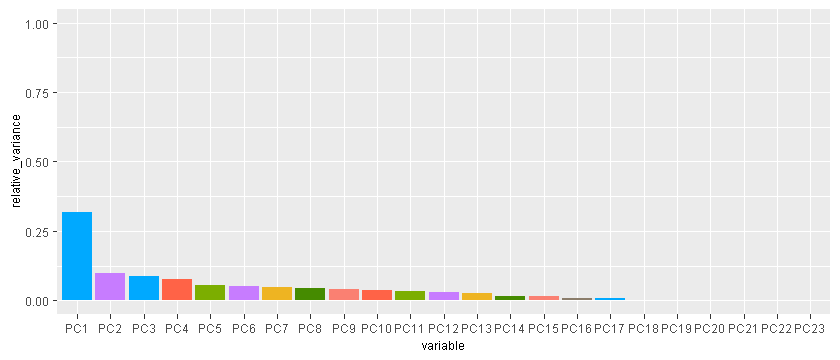

In [10]:
variable = names(data.pc)
sdev = sd_columns(data.pc)
variance = var_columns(data.pc)
cum_variance = cumsum(variance)
relative_variance = variance / sum(variance)
cum_relative_variance = cumsum(relative_variance)

scree.pc = data.frame(variable, sdev, variance, cum_variance, relative_variance, cum_relative_variance)
scree.pc

ggplot(scree.pc) + ylim(0,1) + xlab("variable") +
geom_col(aes(x=factor(variable, levels=variable), y=relative_variance, fill=variable)) +
theme.no_legend

## Predictive Models

### A Naive Bayes Model

In [11]:
model.nb = naiveBayes(class ~ PC1+PC2, data.frame(class, data.pc), laplace=TRUE)
model.nb


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
 bad good 
 0.5  0.5 

Conditional probabilities:
      PC1
Y            [,1]     [,2]
  bad  -0.1489951 2.776709
  good  0.1489951 2.638350

      PC2
Y            [,1]      [,2]
  bad   0.9051323 1.4395436
  good -0.9051323 0.9306082


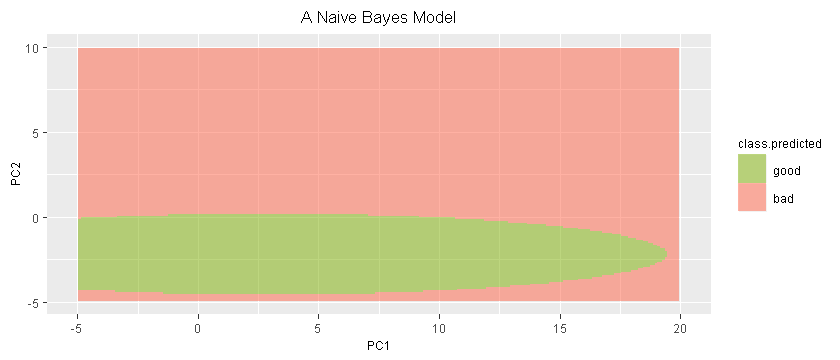

In [57]:
PC1 = seq(-5,20,0.1)
PC2 = seq(-5,50,0.1)
data.test = expand.grid(PC1, PC2); names(data.test) = c("PC1","PC2")
prob = predict(model.nb, data.test, type="raw")
data.test$class.predicted = as.class(prob, "good", cutoff=0.5)

ggplot(data.test) + xlim(-5,20) + ylim(-5,10) +
geom_tile(aes(x=PC1, y=PC2, fill=class.predicted), alpha=0.5, na.rm=TRUE) +
scale_fill_manual(values=PALETTE[3:2]) + guides.standard + theme.legend_title +
ggtitle("A Naive Bayes Model")

### A Support Vector Machine (SVM) Model

In [13]:
set.seed(12345)
model.svm = svm(class ~ PC1+PC2, data.frame(class, data.pc), type="C-classification", kernel="polynomial", degree=2, cost=0.01, scale=FALSE, probability=TRUE)
summary(model.svm)


Call:
svm(formula = class ~ PC1 + PC2, data = data.frame(class, data.pc), 
    type = "C-classification", kernel = "polynomial", degree = 2, 
    cost = 0.01, probability = TRUE, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  0.01 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  1761

 ( 881 880 )


Number of Classes:  2 

Levels: 
 bad good




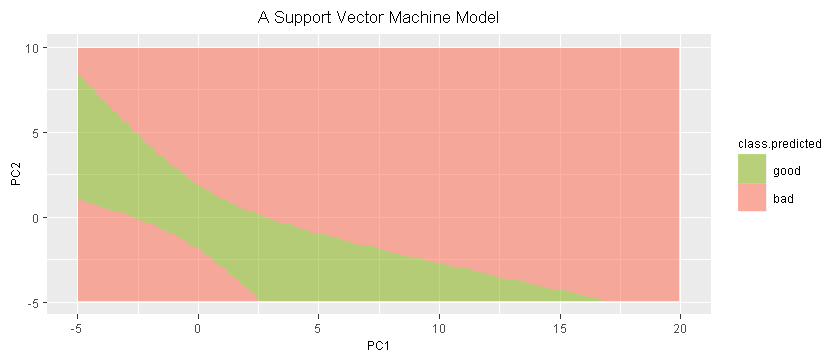

In [58]:
PC1 = seq(-5,20,0.1)
PC2 = seq(-5,50,0.1)
data.test = expand.grid(PC1, PC2); names(data.test) = c("PC1","PC2")
prob = attr(predict(model.svm, data.test, probability=TRUE), "probabilities")
data.test$class.predicted = as.class(prob, "good", cutoff=0.5)

ggplot(data.test) + xlim(-5,20) + ylim(-5,10) +
geom_tile(aes(x=PC1, y=PC2, fill=class.predicted), alpha=0.5, na.rm=TRUE) +
scale_fill_manual(values=PALETTE[3:2]) + guides.standard + theme.legend_title +
ggtitle("A Support Vector Machine Model")

### A Neural Network Model

In [15]:
set.seed(12345)
class.bin = as.binary(class, "good")
model.nn = neuralnet(class.bin ~ PC1+PC2, data.frame(class.bin, data.pc), hidden=c(2,2), algorithm="rprop+", act.fct="logistic", linear.output=FALSE, rep=1)

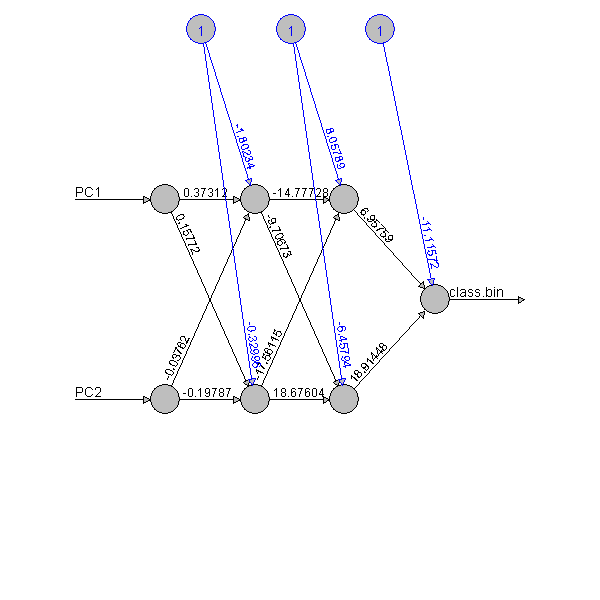

In [16]:
output_size(5,5)
plot(model.nn, rep=1, fill="gray", show.weights=TRUE, information=FALSE, cex=0.7, lwd=0.5, arrow.length=0.15)
output_size(restore)

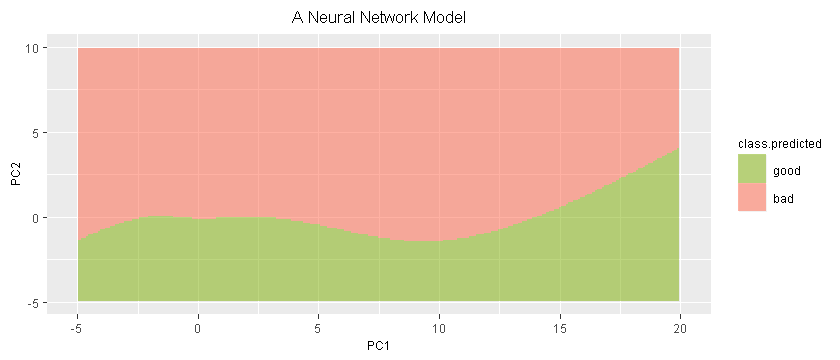

In [59]:
PC1 = seq(-5,20,0.1)
PC2 = seq(-5,50,0.1)
data.test = expand.grid(PC1, PC2); names(data.test) = c("PC1","PC2")

output = compute(model.nn, data.test, rep=1)$net.result
prob = data.frame("good"=output, "bad"=1-output)
data.test$class.predicted = as.class(prob, "good", cutoff=0.5)

ggplot(data.test) + xlim(-5,20) + ylim(-5,10) +
geom_tile(aes(x=PC1, y=PC2, fill=class.predicted), alpha=0.5, na.rm=TRUE) +
scale_fill_manual(values=PALETTE[3:2]) + guides.standard + theme.legend_title +
ggtitle("A Neural Network Model")

### A Logistic Regression Model

In [20]:
model.lr = glm(class ~ PC1+PC2, binomial(link="logit"), data.frame(class, data.pc))
model.lr

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:  glm(formula = class ~ PC1 + PC2, family = binomial(link = "logit"), 
    data = data.frame(class, data.pc))

Coefficients:
(Intercept)          PC1          PC2  
   -0.24168     -0.01912     -2.25303  

Degrees of Freedom: 1999 Total (i.e. Null);  1997 Residual
Null Deviance:	    2773 
Residual Deviance: 1540 	AIC: 1546

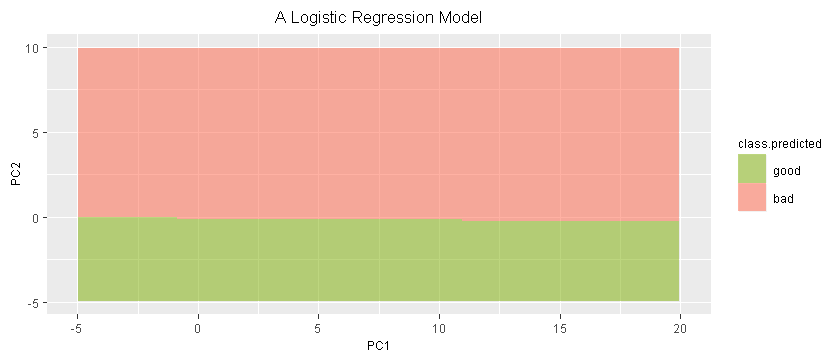

In [60]:
PC1 = seq(-5,20,0.1)
PC2 = seq(-5,50,0.1)
data.test = expand.grid(PC1, PC2); names(data.test) = c("PC1","PC2")

prob.good = predict(model.lr, data.test, type="response")
prob = data.frame("good"=prob.good, "bad"=1-prob.good)
data.test$class.predicted = as.class(prob, class="good", cutoff=0.5)

ggplot(data.test) + xlim(-5,20) + ylim(-5,10) +
geom_tile(aes(x=PC1, y=PC2, fill=class.predicted), alpha=0.5, na.rm=TRUE) +
scale_fill_manual(values=PALETTE[3:2]) + guides.standard + theme.legend_title +
ggtitle("A Logistic Regression Model")

### A Decision Tree Model

In [42]:
model.dt = rpart(class ~ PC1+PC2, data.frame(class, data.pc), method="class", minsplit=5, cp=0, maxdepth=4)
model.dt

n= 2000 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 2000 1000 bad (0.50000000 0.50000000)  
   2) PC2>=-0.1156821 990  160 bad (0.83838384 0.16161616)  
     4) PC2>=0.4273111 660   55 bad (0.91666667 0.08333333) *
     5) PC2< 0.4273111 330  105 bad (0.68181818 0.31818182)  
      10) PC1< -2.763853 77   11 bad (0.85714286 0.14285714)  
        20) PC2< 0.3994017 72    8 bad (0.88888889 0.11111111) *
        21) PC2>=0.3994017 5    2 good (0.40000000 0.60000000) *
      11) PC1>=-2.763853 253   94 bad (0.62845850 0.37154150) *
   3) PC2< -0.1156821 1010  170 good (0.16831683 0.83168317)  
     6) PC2>=-0.4969993 265  104 good (0.39245283 0.60754717)  
      12) PC1< -3.185236 38   10 bad (0.73684211 0.26315789)  
        24) PC2< -0.159503 31    5 bad (0.83870968 0.16129032) *
        25) PC2>=-0.159503 7    2 good (0.28571429 0.71428571) *
      13) PC1>=-3.185236 227   76 good (0.33480176 0.66519824) *
     7) PC2< -0.4969993 745   66 good (0.08859

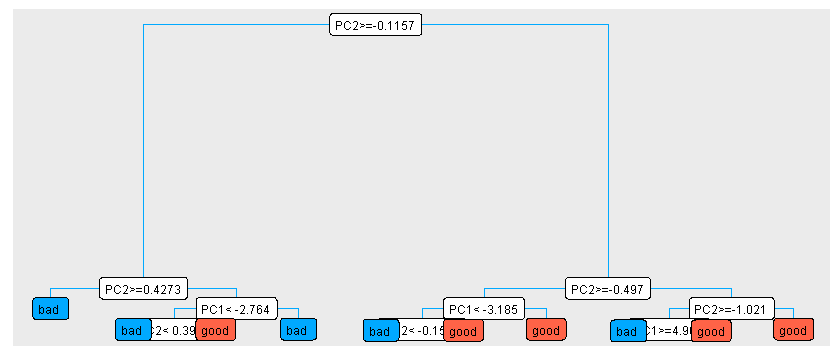

In [46]:
ggtree(model.dt)

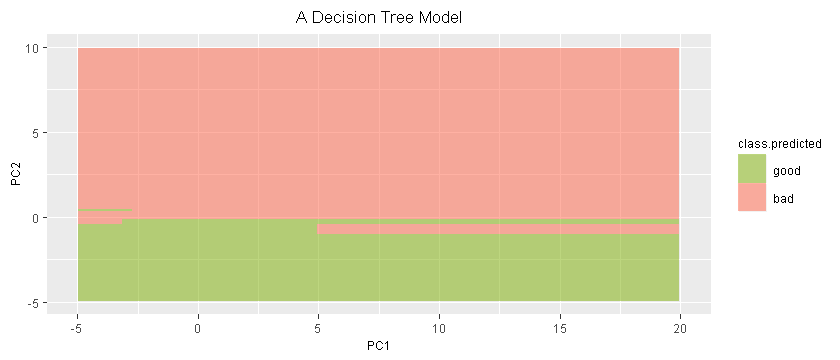

In [61]:
PC1 = seq(-5,20,0.1)
PC2 = seq(-5,50,0.1)
data.test = expand.grid(PC1, PC2); names(data.test) = c("PC1","PC2")

prob = predict(model.dt, data.test, type="prob")
data.test$class.predicted = as.class(prob, class="good", cutoff=0.5)

ggplot(data.test) + xlim(-5,20) + ylim(-5,10) +
geom_tile(aes(x=PC1, y=PC2, fill=class.predicted), alpha=0.5, na.rm=TRUE) +
scale_fill_manual(values=PALETTE[3:2]) + guides.standard + theme.legend_title +
ggtitle("A Decision Tree Model")

### A k-Nearest Neighbors Model

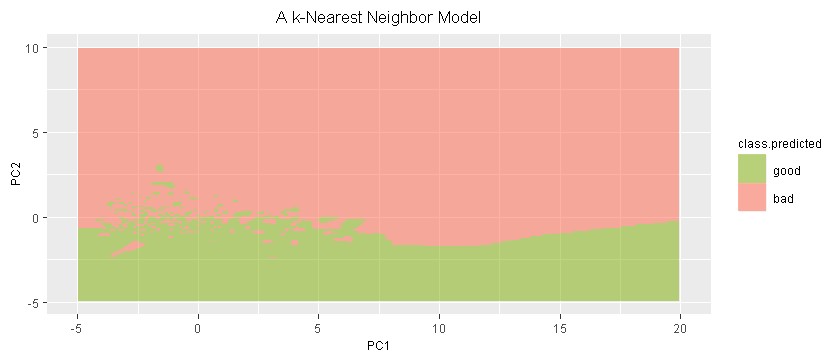

In [62]:
PC1 = seq(-5,20,0.1)
PC2 = seq(-5,50,0.1)
data.test = expand.grid(PC1, PC2); names(data.test) = c("PC1","PC2")

prob = kknn(class ~ PC1+PC2, data.frame(class, data.pc), data.test, k=3)$prob
data.test$class.predicted = as.class(prob, class="good", cutoff=0.5)

ggplot(data.test) + xlim(-5,20) + ylim(-5,10) +
geom_tile(aes(x=PC1, y=PC2, fill=class.predicted), alpha=0.5, na.rm=TRUE) +
scale_fill_manual(values=PALETTE[3:2]) + guides.standard + theme.legend_title +
ggtitle("A k-Nearest Neighbor Model")

<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised October 27, 2019
</span>
</p>